# Profits EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import humanize

In [2]:
profits = pd.read_csv('../data/clean_data/profits_clean.csv', compression='zip', parse_dates=True, index_col='date')
profits.head()

,ar_div,customer_num,sold_to_name,product_line,year,month,start_date,end_date,quantity,ext_price,ext_cost,gross_profit,territory
date,,,,,,,,,,,,,
2017-01-01,0,1000438,Farmer Joe's - Fruitvale Ave.,DCD,2017,1,1/1/2017,12/31/2017,1941.0,6976.10,4969.73,2006.37,EB
2017-01-01,0,1014136,"Seven Eleven-Redwood Hwy,M.V.",DCD,2017,1,1/1/2017,12/31/2017,120.0,186.00,148.08,37.92,MR
2017-01-01,0,1008110,Nugget - #15 Corte Madera,DCD,2017,1,1/1/2017,12/31/2017,144.0,335.82,302.97,32.85,MR
2017-01-01,0,1008110,Nugget - #15 Corte Madera,DCD,2017,1,1/1/2017,12/31/2017,57.0,179.50,134.09,45.41,MR
2017-01-01,0,1008111,Nugget - #16 Novato,DCD,2017,1,1/1/2017,12/31/2017,165.0,379.33,325.57,53.76,MR


In [3]:
cols = [
    'territory',
    'sold_to_name',
    'product_line',
    'quantity',
    'ext_price',
    'ext_cost',
    'gross_profit'
]

profits = profits[cols]
profits.head(2)

,territory,sold_to_name,product_line,quantity,ext_price,ext_cost,gross_profit
date,,,,,,,
2017-01-01,EB,Farmer Joe's - Fruitvale Ave.,DCD,1941.0,6976.1,4969.73,2006.37
2017-01-01,MR,"Seven Eleven-Redwood Hwy,M.V.",DCD,120.0,186.0,148.08,37.92


split into two data frames for each product line

In [4]:
dcd = profits[profits['product_line'] == 'DCD']
pf = profits[profits['product_line'] == 'PF']

group by index, sum the profits

In [5]:
dcd_sum = dcd.groupby(by=dcd.index)[['gross_profit']].sum()
pf_sum = pf.groupby(by=pf.index)[['gross_profit']].sum()

rolling average to smooth out the graph

In [6]:
dcd_rolling = dcd_sum.rolling(12).mean()
pf_rolling = pf_sum.rolling(12).mean()

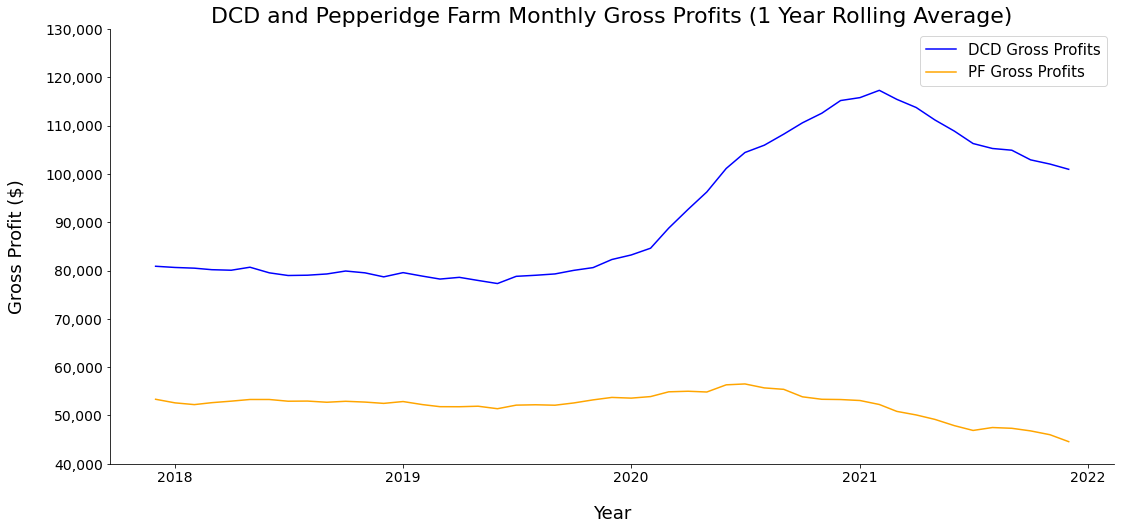

In [15]:
plt.figure(figsize=(18,8))

plt.plot(dcd_rolling, color='blue', label='DCD Gross Profits')
plt.plot(pf_rolling, color='orange', label='PF Gross Profits')

xlocs, _ = plt.xticks()
xlocs = [loc for idx, loc in enumerate(xlocs) if idx not in [1, 3, 5, 7]]
xlabels = [2018, 2019, 2020, 2021, 2022]
plt.xticks(fontsize=14, ticks=xlocs, labels=xlabels)

ylocs, _ = plt.yticks()
ylabels = [humanize.intcomma(int(label)) for label in plt.yticks()[0]]
plt.yticks(fontsize=14, ticks=ylocs, labels=ylabels)

plt.title('DCD and Pepperidge Farm Monthly Gross Profits (1 Year Rolling Average)', fontsize=22)
plt.xlabel('Year', fontsize=18, labelpad=20)
plt.ylabel('Gross Profit ($)', fontsize=18, labelpad=20)

sns.despine()
plt.legend(prop={'size': 15})

plt.savefig('../images/dcd_pf_profits.png');

Profits increased during covid, but have begun to decrease.

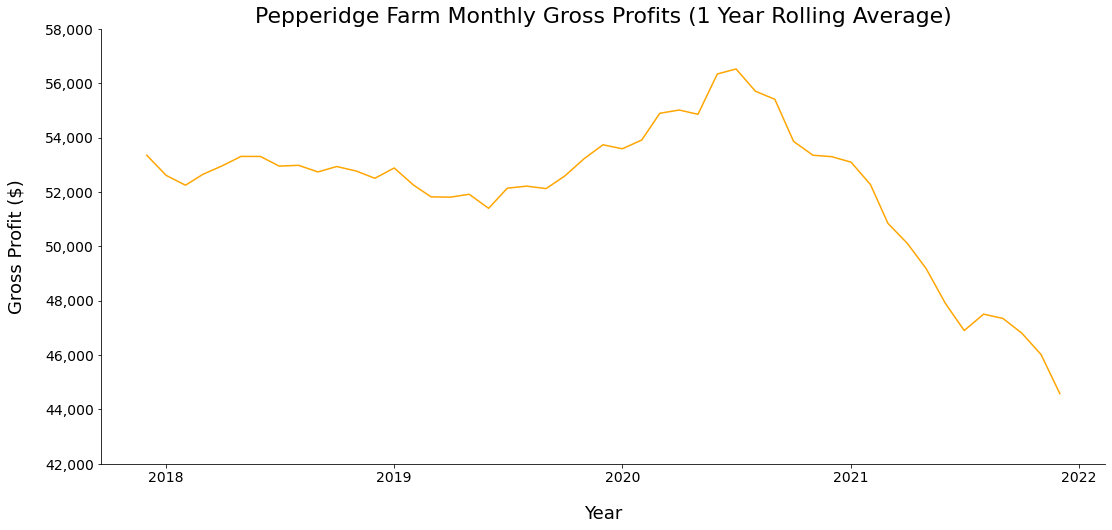

In [8]:
plt.figure(figsize=(18,8))
plt.plot(pf_rolling, color='orange')

xlocs, _ = plt.xticks()
xlocs = [loc for idx, loc in enumerate(xlocs) if idx not in [1, 3, 5, 7]]
xlabels = [2018, 2019, 2020, 2021, 2022]
plt.xticks(fontsize=14, ticks=xlocs, labels=xlabels)

ylocs, _ = plt.yticks()
ylabels = [humanize.intcomma(int(label)) for label in plt.yticks()[0]]
plt.yticks(fontsize=14, ticks=ylocs, labels=ylabels)

plt.title('Pepperidge Farm Monthly Gross Profits (1 Year Rolling Average)', fontsize=22)
plt.xlabel('Year', fontsize=18, labelpad=20)
plt.ylabel('Gross Profit ($)', fontsize=18, labelpad=20)

sns.despine()

plt.savefig('../images/pf_profits.png');

PF profits have taken a dive. The cause of this can be seen in the pf_orders.ipynb

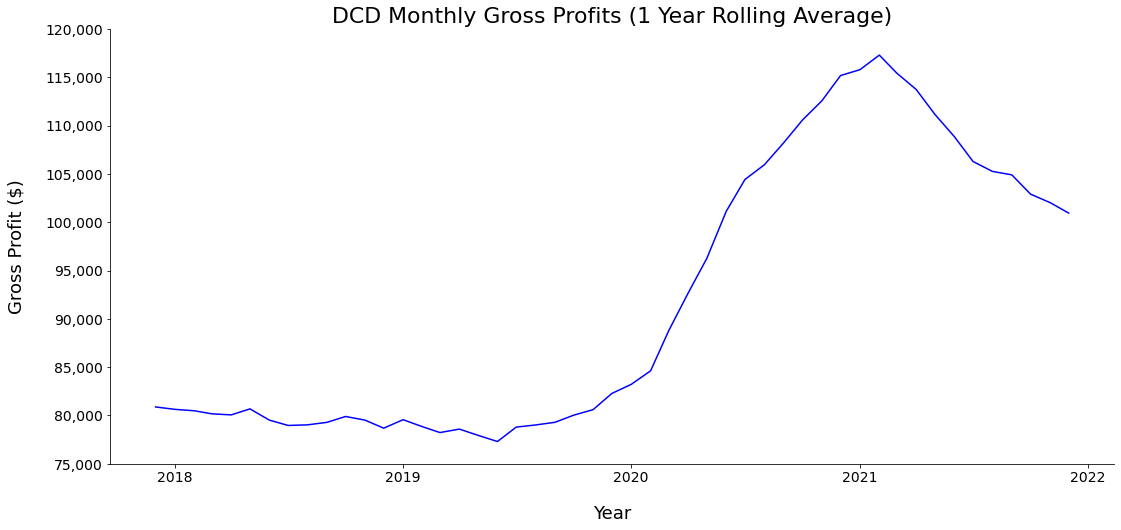

In [9]:
plt.figure(figsize=(18,8))
plt.plot(dcd_rolling, color='blue')

xlocs, _ = plt.xticks()
xlocs = [loc for idx, loc in enumerate(xlocs) if idx not in [1, 3, 5, 7]]
xlabels = [2018, 2019, 2020, 2021, 2022]
plt.xticks(fontsize=14, ticks=xlocs, labels=xlabels)

ylocs, _ = plt.yticks()
ylabels = [humanize.intcomma(int(label)) for label in plt.yticks()[0]]
plt.yticks(fontsize=14, ticks=ylocs, labels=ylabels)


plt.title('DCD Monthly Gross Profits (1 Year Rolling Average)', fontsize=22)
plt.xlabel('Year', fontsize=18, labelpad=20)
plt.ylabel('Gross Profit ($)', fontsize=18, labelpad=20)

sns.despine()

plt.savefig('../images/dcd_profits.png');

DCD did well during covid, but have begun to decrease. I'll look to stop this trend.

# Misc Calculations for Presentation

In [10]:
dcd_2020 = profits[(profits['product_line'] == 'DCD')].loc['2020']['gross_profit'].sum()
dcd_2020

1382129.92

In [11]:
dcd_2021 = profits[(profits['product_line'] == 'DCD')].loc['2021']['gross_profit'].sum()
dcd_2021

1211356.5499999998

In [12]:
4640 / dcd_2021

0.003830416403824292

In [13]:
26200 / dcd_2021

0.021628644349180267